## 1.引入数据

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Image

    sepal_length  sepal_width  petal_length  petal_width     species
33           5.5          4.2           1.4          0.2      setosa
83           6.0          2.7           5.1          1.6  versicolor
76           6.8          2.8           4.8          1.4  versicolor
91           6.1          3.0           4.6          1.4  versicolor
3            4.6          3.1           1.5          0.2      setosa
['setosa' 'versicolor' 'virginica']


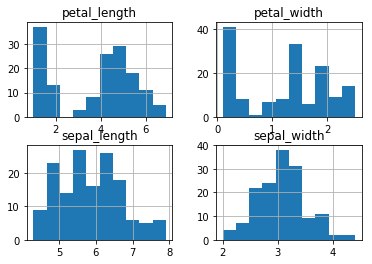

In [2]:
# Read in dataset
iris = pandas.read_csv("iris.csv")

# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

# There are 2 species
print(iris.species.unique())
iris.hist()
plt.show()

└从图中可以看出：
* iris 数据集是一个三分类数据
* 有 4 个x，即 feature

## 2. nearon

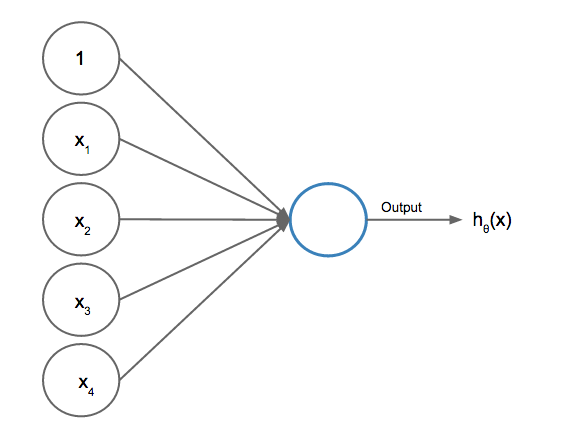

In [3]:
Image("images/dataquest_neral01.png")

这个神经元总共有 5 个单元，代表 x，其中 1 个是 偏置单元，4 个为 feature,偏置单元相当

In [28]:
z = np.asarray([[9, 5, 4]])
y = np.asarray([[-1, 2, 4]])

# np.dot is used for matrix multiplication
# z is 1x3 and y is 1x3,  z * y.T is then 1x1
print(np.dot(z,y.T))

# Variables to test sigmoid_activation
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

# The first observation
x0 = X[0]

# Initialize thetas randomly 
theta_init = np.random.normal(0,0.01,size=(5,1))


[[17]]


In [6]:
print(theta_init)

[[-0.00950482]
 [-0.00193544]
 [ 0.00453805]
 [ 0.01238943]
 [-0.00139756]]


In [45]:
def sigmoid_activation(X, theta):
    return 1 / (1 + np.exp(-(np.dot(X, theta))))

a1 = sigmoid_activation(x0.reshape((1, 5)), theta_init)

两个向量的点乘

In [94]:
w = np.array([1, 2, 3])
x = np.array([3, 2, 1])

In [95]:
w.dot(x)

10

列向量, 当成一个矩阵

In [97]:
w = w.reshape((3, 1))

In [98]:
w.dot(x)

ValueError: shapes (3,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)

矩阵乘不了向量，但矩阵之间可以乘

In [120]:
x = x.reshape((3, 1))

In [106]:
w.T.dot(x)

array([[10]])

**??但这里有个疑问了，为何行展开的矩阵可以乘向量**

In [107]:
w.T

array([[1, 2, 3]])

In [128]:
x = x.reshape((3,))

In [129]:
x

array([3, 2, 1])

In [130]:
x.shape

(3,)

In [131]:
w.T.dot(x)

array([10])

关于向量点积运算，请参考 https://www.youtube.com/watch?v=yAgqlTfWc9E

In [ ]:
def singlecost(x, y, theta):
    h = sigmoid_activation(x, theta)
    j = -(y * np.log(h) + (1 - y) * np.log(h))/ x.shape[0]
    return j